Image 1 (save_1.jpg): Mean Squared Error=5330.02, Structural Similarity Index=0.37
Image 2 (save_2.jpg): Mean Squared Error=6414.46, Structural Similarity Index=0.27
Image 3 (save_3.jpg): Mean Squared Error=5201.05, Structural Similarity Index=0.33
Image 4 (save_4.jpg): Mean Squared Error=6220.07, Structural Similarity Index=0.24


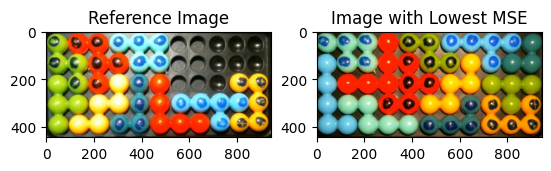

In [6]:
import os
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np

def mse(image1, image2):
    return np.sum((image1.astype("float") - image2.astype("float")) ** 2) / float(image1.size)

def compare_images(reference_image, image_folder):
    gray_reference_image = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    results = []
    min_mse_image, min_mse_value = None, float('inf')
    for index, jpeg_file in enumerate(os.listdir(image_folder), start=1):
        image_path = os.path.join(image_folder, jpeg_file)
        current_image = cv2.imread(image_path)
        current_image = cv2.resize(current_image, (reference_image.shape[1], reference_image.shape[0]))
        gray_image = cv2.cvtColor(current_image, cv2.COLOR_BGR2GRAY)
        mse_value = mse(gray_reference_image, gray_image)
        ssim_value = ssim(gray_reference_image, gray_image)
        results.append((f"Image {index} ({jpeg_file})", mse_value, ssim_value))
        if mse_value < min_mse_value:
            min_mse_value, min_mse_image = mse_value, current_image
    return results, min_mse_image

reference_image = cv2.imread("./pic/test/save_9.jpg")
image_folder = "./pic/compare/"
common_width, common_height = reference_image.shape[1], reference_image.shape[0]
results, min_mse_image = compare_images(reference_image, image_folder)

for name, mse_value, ssim_value in results:
    print(f"{name}: Mean Squared Error={round(mse_value, 2)}, Structural Similarity Index={round(ssim_value, 2)}")

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
plt.title("Reference Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(min_mse_image, cv2.COLOR_BGR2RGB))
plt.title("Image with Lowest MSE")
plt.show()

In [1]:
import cv2
import os
cap = cv2.VideoCapture(1)
file_list = os.listdir("./pic/compare/")
num_images = sum(file.lower().endswith('.jpg') for file in file_list)
while cv2.waitKey(1) & 0xFF != ord('q'):
    ret, frame = cap.read()
    image = frame.copy()
    cv2.rectangle(image, (5, 20), (635, 315), (0, 255, 0), 2)
    cv2.imshow('frame', image)

roi_cropped = frame[20:315, 5:635]
roi_width = int(roi_cropped.shape[1] * (150 / 100))
roi_height = int(roi_cropped.shape[0] * (150 / 100))
cropped = cv2.resize(roi_cropped, (roi_width, roi_height), interpolation=cv2.INTER_AREA)
cv2.imwrite(f'./pic/compare/save_{num_images + 1}.jpg', cropped)
vertical_flip = cv2.flip(cropped, 0)
cv2.imwrite(f'./pic/compare/save_{num_images + 2}.jpg', vertical_flip)
horizontal_flip = cv2.flip(cropped, 1)
cv2.imwrite(f'./pic/compare/save_{num_images + 3}.jpg', horizontal_flip)
both_flip = cv2.flip(cropped, -1)
cv2.imwrite(f'./pic/compare/save_{num_images + 4}.jpg', both_flip)
cap.release()
cv2.destroyAllWindows()
